## Exercise 02 - Connectionist Neurons and Multi Layer Perceptrons

T2.1 - a)

In [138]:
import numpy as np
import matplotlib.pyplot as plt

In [139]:
def f(h):
    out_array = []
    for i in h:
        if i>=0: out_array = [out_array, 1]
        else: out_array = [out_array, 0]

In [140]:
expdat = np.genfromtxt(fname='applesOranges.csv', delimiter=',', 
                       dtype=np.float, skip_header=1)

x_1 = expdat[:,0]
x_2 = expdat[:,1]
y = expdat[:,2]

In [141]:
func = lambda h: 1 if h>=0 else 0

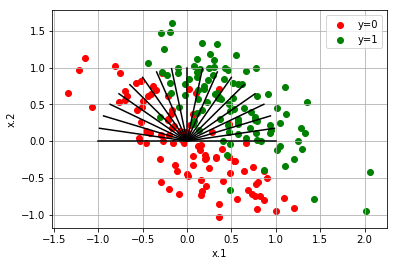

In [231]:
plt.figure()
plt.scatter(x_1[y==0], x_2[y==0], label = 'y=0', color= 'r')
plt.scatter(x_1[y==1], x_2[y==1], label = 'y=1', color= 'g')
plt.legend()
plt.grid()
plt.xlabel("x.1")
plt.ylabel("x.2")

radius = 1
angle = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100,
         110, 120,130, 140, 150, 160, 170, 180]

bias = 0
correct_class = {}
w_vectors={}
f = lambda x : 1 if (x >=0) else 0

for i in angle:
    
    w = np.array([[radius* np.cos(i*2*np.pi/360)],
        [radius* np.sin(i*2*np.pi/360)]]).T
    h=np.array(w @ np.array((x_1, x_2)) -bias)
    
    
    y_pred = [f(a) for a in h[0, :]]


    correct = sum(y==y_pred)
    plt.plot((0, w[0, 0]), (0, w[0, 1]), color= 'black')
    
    correct_class[i] = (correct/y.shape[0])*100
    w_vectors[i] = w

plt.show()


In [232]:
# Classification performance

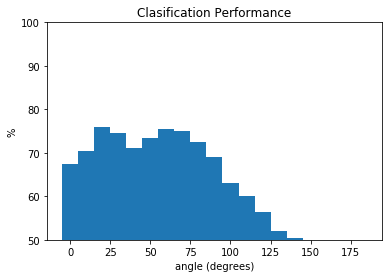

In [235]:
plt.figure()
plt.title("Clasification Performance")
plt.bar(correct_class.keys(), correct_class.values(), 10)
plt.xlabel("angle (degrees)")
plt.ylabel("%")
plt.ylim(50, 100)
plt.show()

In [238]:
better_w_angle = max(correct_class, key=correct_class.get)
print(better_w_angle)

20
